<a href="https://colab.research.google.com/github/10sneha/Face-Recognition/blob/main/FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakankshasingh21","key":"1f72d11168368b1bfe067d49cb12b9ca"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vasukipatel/face-recognition-dataset

100% 724M/726M [00:27<00:00, 36.8MB/s]
100% 726M/726M [00:27<00:00, 27.6MB/s]


In [ ]:
!unzip face-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Faces/Faces/Alexandra Daddario_76.jpg  
  inflating: Faces/Faces/Alexandra Daddario_77.jpg  
  inflating: Faces/Faces/Alexandra Daddario_78.jpg  
  inflating: Faces/Faces/Alexandra Daddario_79.jpg  
  inflating: Faces/Faces/Alexandra Daddario_8.jpg  
  inflating: Faces/Faces/Alexandra Daddario_80.jpg  
  inflating: Faces/Faces/Alexandra Daddario_81.jpg  
  inflating: Faces/Faces/Alexandra Daddario_82.jpg  
  inflating: Faces/Faces/Alexandra Daddario_83.jpg  
  inflating: Faces/Faces/Alexandra Daddario_84.jpg  
  inflating: Faces/Faces/Alexandra Daddario_85.jpg  
  inflating: Faces/Faces/Alexandra Daddario_86.jpg  
  inflating: Faces/Faces/Alexandra Daddario_87.jpg  
  inflating: Faces/Faces/Alexandra Daddario_88.jpg  
  inflating: Faces/Faces/Alexandra Daddario_89.jpg  
  inflating: Faces/Faces/Alexandra Daddario_9.jpg  
  inflating: Faces/Faces/Alexandra Daddario_90.jpg  
  inflating: Faces/Faces/Alexandra Daddario_91.jpg

In [ ]:
train_dir = 'Original Images/Original Images'

In [ ]:
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% of the data will be used for validation
)

In [ ]:
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for training data
)

Found 2318 images belonging to 31 classes.


In [ ]:
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # This is for validation data
)

Found 244 images belonging to 31 classes.


In [ ]:
classes = list(train_ds.class_indices.keys())
print(classes)

['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


### **VGG16**

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

IMAGE_SIZE = [128, 128]
 # loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(31, activation = 'softmax')(x)

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],steps_per_execution=32)
print("model created")


58889256/58889256 [==============================] - 2s 0us/step
model created


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
BATCH_SIZE = 16  # Define your batch size, for example, 16

history = model.fit(train_ds, epochs=20, validation_data=val_ds, batch_size=BATCH_SIZE)


Epoch 1/20
73/73 [==============================] - 61s 839ms/step - loss: 3.1846 - accuracy: 0.1268 - val_loss: 2.8595 - val_accuracy: 0.1803
Epoch 2/20
73/73 [==============================] - 48s 657ms/step - loss: 2.4690 - accuracy: 0.2903 - val_loss: 2.5044 - val_accuracy: 0.2582
Epoch 3/20
73/73 [==============================] - 47s 642ms/step - loss: 2.0705 - accuracy: 0.3943 - val_loss: 2.2351 - val_accuracy: 0.3074
Epoch 4/20
73/73 [==============================] - 47s 649ms/step - loss: 1.7919 - accuracy: 0.4607 - val_loss: 2.2796 - val_accuracy: 0.3115
Epoch 5/20
73/73 [==============================] - 48s 660ms/step - loss: 1.5122 - accuracy: 0.5522 - val_loss: 2.0581 - val_accuracy: 0.3893
Epoch 6/20
73/73 [==============================] - 48s 662ms/step - loss: 1.2976 - accuracy: 0.6307 - val_loss: 2.0666 - val_accuracy: 0.3361
Epoch 7/20
73/73 [==============================] - 48s 664ms/step - loss: 1.1942 - accuracy: 0.6570 - val_loss: 1.9241 - val_accuracy: 0.4180

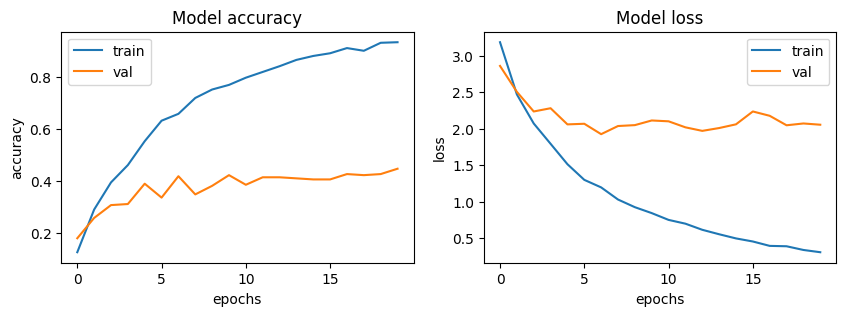

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 [==============================] - 42s 579ms/step - loss: 0.2606 - accuracy: 0.9474
Training Accuracy:  94.74


In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {validation_accuracy*100: .2f}")

8/8 [==============================] - 5s 651ms/step - loss: 2.0711 - accuracy: 0.3689
Validation Accuracy:  36.89


In [ ]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [ ]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 [==============================] - 5s 631ms/step - loss: 2.0053 - accuracy: 0.4385
Test Accuracy: 43.85%


### **ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

IMAGE_SIZE = [128, 128]

# Load ResNet50 model pre-trained on ImageNet data
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze all layers in the ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = Flatten()(resnet.output)
x = Dense(31, activation='softmax')(x)

# Create a new model
model = Model(inputs=resnet.input, outputs=x)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model created successfully.")


94765736/94765736 [==============================] - 3s 0us/step
Model created successfully.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
BATCH_SIZE = 16
history = model.fit(train_ds, epochs=20, validation_data=val_ds, batch_size=BATCH_SIZE)

Epoch 1/20
73/73 [==============================] - 51s 692ms/step - loss: 3.5347 - accuracy: 0.0574 - val_loss: 3.3962 - val_accuracy: 0.0574
Epoch 2/20
73/73 [==============================] - 49s 670ms/step - loss: 3.3675 - accuracy: 0.0811 - val_loss: 3.2852 - val_accuracy: 0.0574
Epoch 3/20
73/73 [==============================] - 49s 675ms/step - loss: 3.2445 - accuracy: 0.1130 - val_loss: 3.2412 - val_accuracy: 0.1025
Epoch 4/20
73/73 [==============================] - 48s 660ms/step - loss: 3.2182 - accuracy: 0.1031 - val_loss: 3.2462 - val_accuracy: 0.0779
Epoch 5/20
73/73 [==============================] - 48s 656ms/step - loss: 3.1011 - accuracy: 0.1303 - val_loss: 3.2660 - val_accuracy: 0.1107
Epoch 6/20
73/73 [==============================] - 47s 641ms/step - loss: 3.0831 - accuracy: 0.1329 - val_loss: 3.2229 - val_accuracy: 0.1107
Epoch 7/20
73/73 [==============================] - 49s 665ms/step - loss: 3.0159 - accuracy: 0.1514 - val_loss: 3.2395 - val_accuracy: 0.1270

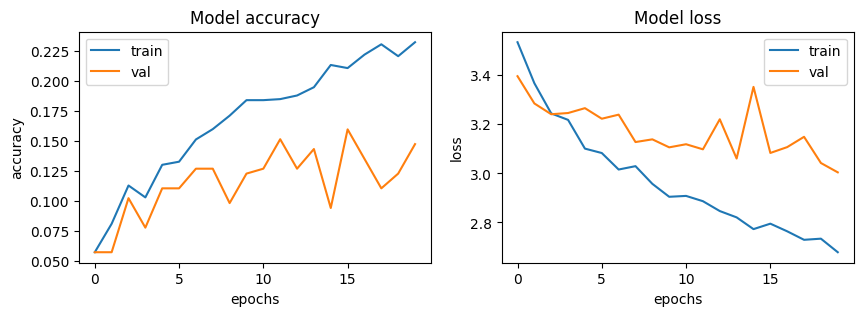

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 [==============================] - 44s 593ms/step - loss: 2.5712 - accuracy: 0.2834
Training Accuracy:  28.34


In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {validation_accuracy*100: .2f}")

8/8 [==============================] - 6s 742ms/step - loss: 3.0339 - accuracy: 0.1311
Validation Accuracy:  13.11


In [ ]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [ ]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 [==============================] - 6s 721ms/step - loss: 3.0094 - accuracy: 0.1434
Test Accuracy: 14.34%


### **DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

IMAGE_SIZE = [128, 128]

# Load DenseNet121 model pre-trained on ImageNet data
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze all layers in the DenseNet121 model
for layer in densenet.layers:
    layer.trainable = False

# Add custom classification layers on top of DenseNet121
x = Flatten()(densenet.output)
x = Dense(31, activation='softmax')(x)  # Adjust the number of units based on your classification task

# Create a new model
model = Model(inputs=densenet.input, outputs=x)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model created successfully.")


29084464/29084464 [==============================] - 1s 0us/step
Model created successfully.


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']    

In [ ]:
BATCH_SIZE = 16
history = model.fit(train_ds, epochs=20, validation_data=val_ds, batch_size=BATCH_SIZE)

Epoch 1/20
73/73 [==============================] - 65s 740ms/step - loss: 5.0971 - accuracy: 0.2105 - val_loss: 4.2897 - val_accuracy: 0.3238
Epoch 2/20
73/73 [==============================] - 49s 675ms/step - loss: 2.6941 - accuracy: 0.4491 - val_loss: 3.4209 - val_accuracy: 0.3402
Epoch 3/20
73/73 [==============================] - 48s 656ms/step - loss: 2.0504 - accuracy: 0.5716 - val_loss: 3.7350 - val_accuracy: 0.3402
Epoch 4/20
73/73 [==============================] - 48s 666ms/step - loss: 1.6170 - accuracy: 0.6152 - val_loss: 3.5797 - val_accuracy: 0.3770
Epoch 5/20
73/73 [==============================] - 48s 656ms/step - loss: 1.5685 - accuracy: 0.6721 - val_loss: 4.3976 - val_accuracy: 0.3811
Epoch 6/20
73/73 [==============================] - 47s 641ms/step - loss: 1.2077 - accuracy: 0.7101 - val_loss: 4.5863 - val_accuracy: 0.3730
Epoch 7/20
73/73 [==============================] - 47s 648ms/step - loss: 1.0719 - accuracy: 0.7506 - val_loss: 4.4400 - val_accuracy: 0.3975

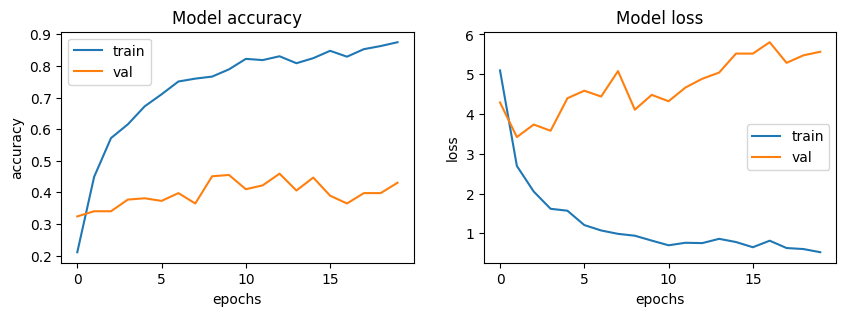

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 [==============================] - 42s 576ms/step - loss: 0.4815 - accuracy: 0.8978
Training Accuracy:  89.78


In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {validation_accuracy*100: .2f}")

8/8 [==============================] - 6s 727ms/step - loss: 5.1205 - accuracy: 0.4385
Validation Accuracy:  43.85


In [ ]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [ ]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 [==============================] - 5s 629ms/step - loss: 5.4913 - accuracy: 0.4262
Test Accuracy: 42.62%
